In [48]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [36]:
df = load_diabetes(as_frame = True).frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [37]:
X = df.drop(["target"] , axis = 1)
y = df["target"]

X_train ,X_test ,y_train ,y_test = train_test_split(
    X , y , test_size = 0.2 , random_state = 42
)

In [50]:
model = DecisionTreeRegressor(max_depth=7,min_samples_leaf=20)
model.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MSE train : " , mean_squared_error(y_train , y_pred_train))
print("MSE test : " , mean_squared_error(y_test , y_pred_test))

print("r^2 train : " , r2_score(y_train , y_pred_train))
print("R^2 test :" , r2_score(y_test , y_pred_test ))

MSE train :  2712.48075111857
MSE test :  3258.996155814711
r^2 train :  0.5536038381089772
R^2 test : 0.38488055637002505


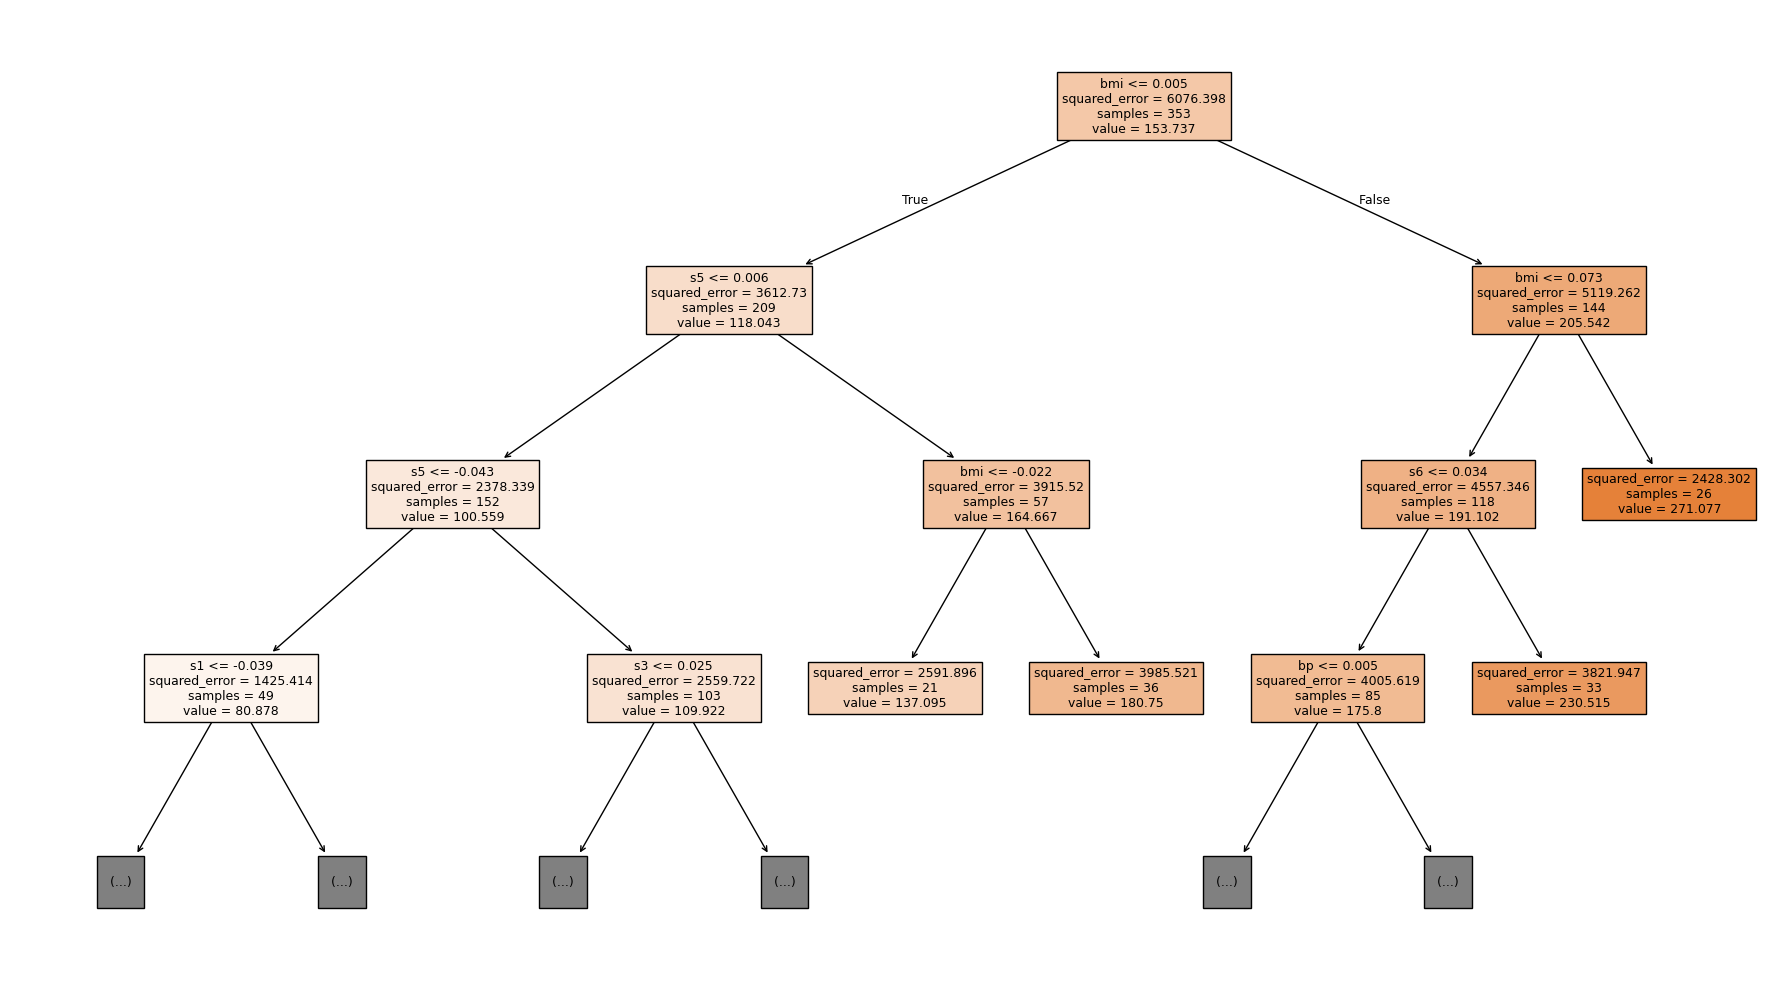

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize = (18,10))

plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    max_depth = 3
)
plt.tight_layout()